<a href="https://colab.research.google.com/github/PatrickRuan/3rd-ML100Days/blob/master/homework/Day084_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

def build_mlp(input, output=10, units=[256, 128, 128], L2r=0.):
    """Code Here
    建立你的神經網路
    """
    model = Sequential()
    for i, n in enumerate(units):
      if i == 0:
        print(i)
        model.add(Dense(units=n, input_shape=input,kernel_regularizer=regularizers.l2(L2r), activation='relu'))
      else:
        print(i)
        model.add(Dense(units=n, kernel_regularizer=regularizers.l2(L2r), activation='relu'))  
    model.add(Dense(10,activation='softmax'))  

    return model

In [0]:
"""Code Here
設定超參數
"""
batch_size =256
epochs=50

In [45]:
#results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
l2r = [0, 0.1, 0.01, 0.001]
l2r = [1e-4, 1e-5, 1e-6, 1e-7]
for l2 in l2r:
  model = build_mlp(input=x_train.shape[1:], L2r=l2)
  model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
  model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)
  results[l2]={'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

0
1
2
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.9694 - acc: 0.3079 - val_loss: 1.8305 - val_acc: 0.3595
Epoch 2/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.7437 - acc: 0.3946 - val_loss: 1.6803 - val_acc: 0.4142
Epoch 3/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.6586 - acc: 0.4204 - val_loss: 1.6239 - val_acc: 0.4386
Epoch 4/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6024 - acc: 0.4435 - val_loss: 1.5736 - val_acc: 0.4537
Epoch 5/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5511 - acc: 0.4580 - val_loss: 1.5382 - val_acc: 0.4606
Epoch 6/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5198 - acc: 0.4706 - val_loss: 1.5278 - val_acc: 0.4695
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4867 - acc: 0.4806 - val_loss: 1.4

dict_keys([0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07])


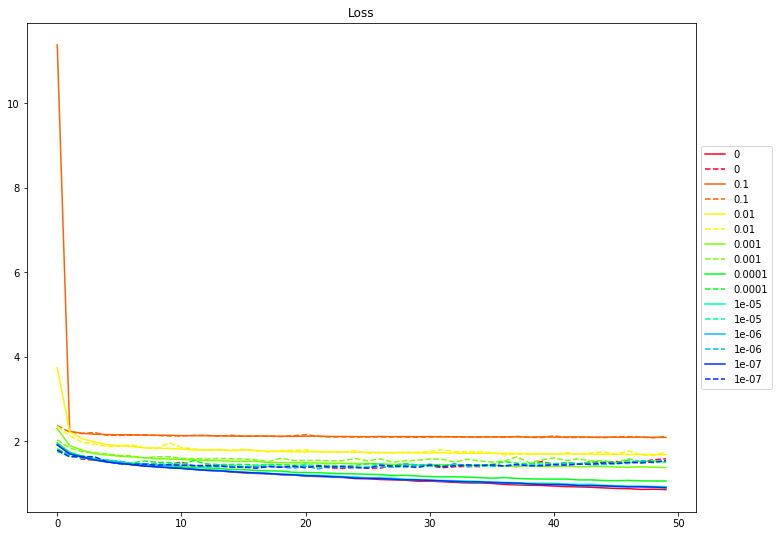

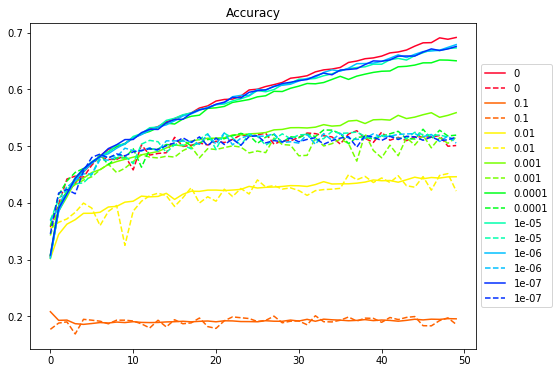

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i*2])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i*2])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i*2])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i*2])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()